In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the kaggle digit dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognition/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognition/test.csv')

Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

In [ ]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

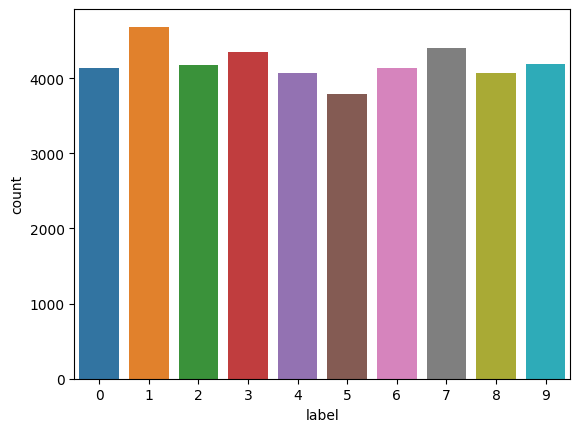

In [ ]:
sns.countplot(data=train, x="label")

In [ ]:
# Load the keras MNIST dataset
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28 * 28)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = test / 255.0
X_train1 = X_train1 / 255.0

In [ ]:
X_train = np.concatenate((X_train, X_train1))
Y_train = np.concatenate((Y_train, Y_train1))

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [ ]:
# Encode labels into one-hot vectors
# "Label 2 ---> (0, 0, 1, 0, 0, 0, 0, 0, 0, 0)"
Y_train = to_categorical(Y_train, num_classes=10)

In [ ]:
# Split the training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((100800, 28, 28, 1), (11200, 28, 28, 1), (100800, 10), (11200, 10))

In [ ]:
model = Sequential()

model.add(Conv2D(filters=4, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

# model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
# model.add(BatchNormalization())

# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',  activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation ='softmax'))

In [ ]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 128

datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)

In [ ]:
epochs = 10

history = model.fit(train_gen, epochs=epochs, validation_data = (X_val, Y_val))

Epoch 1/10
788/788 [==============================] - 92s 115ms/step - loss: 0.6984 - accuracy: 0.7905 - val_loss: 0.2430 - val_accuracy: 0.9338
Epoch 2/10
788/788 [==============================] - 89s 113ms/step - loss: 0.3654 - accuracy: 0.8873 - val_loss: 0.1593 - val_accuracy: 0.9492
Epoch 3/10
788/788 [==============================] - 92s 117ms/step - loss: 0.3301 - accuracy: 0.8979 - val_loss: 0.1462 - val_accuracy: 0.9543
Epoch 4/10
788/788 [==============================] - 91s 115ms/step - loss: 0.3066 - accuracy: 0.9057 - val_loss: 0.1684 - val_accuracy: 0.9484
Epoch 5/10
788/788 [==============================] - 91s 116ms/step - loss: 0.2879 - accuracy: 0.9123 - val_loss: 0.1380 - val_accuracy: 0.9571
Epoch 6/10
788/788 [==============================] - 88s 112ms/step - loss: 0.2849 - accuracy: 0.9127 - val_loss: 0.1710 - val_accuracy: 0.9473
Epoch 7/10
788/788 [==============================] - 89s 113ms/step - loss: 0.2740 - accuracy: 0.9160 - val_loss: 0.1242 - val_ac

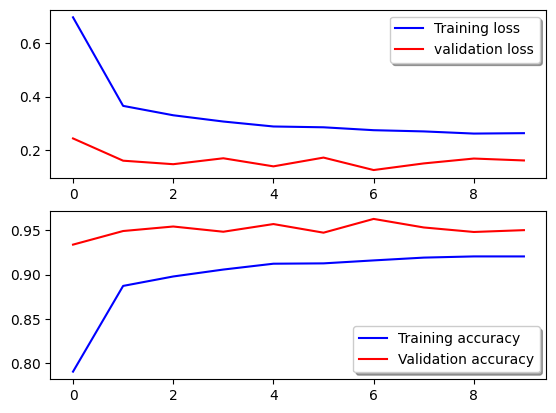

In [ ]:
# Evaluate the model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
result = np.zeros((X_test.shape[0], 10))

result = model.predict(X_test)
result = np.argmax(result, axis=1)
result = pd.Series(result, name="Label")

875/875 [==============================] - 10s 11ms/step


In [ ]:
result.head()

0    2
1    0
2    9
3    2
4    3
Name: Label, dtype: int64